In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


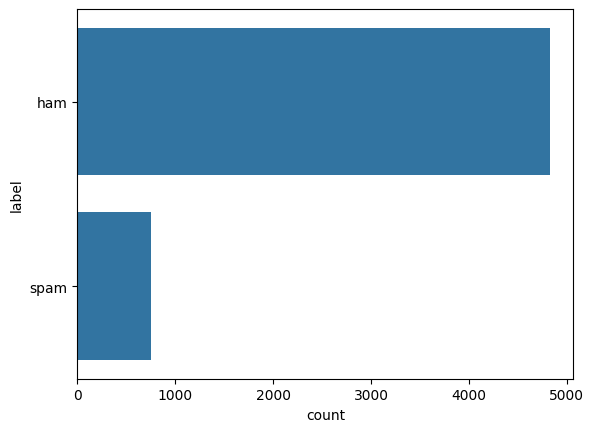

In [60]:
sns.countplot(y=df['label']);

In [61]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

#### Data Preparation

In [62]:
# 1. Remove Punctuation
# 2. Remove Stopwords
# 3. Remove affixes

In [63]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string

In [64]:
sent='Hello friends! How are you? Welcome to python Programming'

In [65]:
tokens1=word_tokenize(sent)

In [66]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'Welcome',
 'to',
 'python',
 'Programming']

In [67]:
tokens2=[x.lower() for x in tokens1 if x not in string.punctuation]    # Remove Punctuation
tokens2

['hello',
 'friends',
 'how',
 'are',
 'you',
 'welcome',
 'to',
 'python',
 'programming']

In [68]:
ls=LancasterStemmer()    # Remove affixes
tokens3=[ls.stem(x) for x in tokens2 if x not in stopwords.words('english')]  # Remove Stopwords
tokens3

['hello', 'friend', 'welcom', 'python', 'program']

In [69]:
def clean_text(text):
    ls=LancasterStemmer() 
    tokens1=word_tokenize(text)
    tokens2=[x.lower() for x in tokens1 if x.isalpha() or x.isdigit()] # if x not in string.punctuation
    tokens3=[ls.stem(x) for x in tokens2 if x not in stopwords.words('english')] 
    return tokens3

In [70]:
clean_text(sent)

['hello', 'friend', 'welcom', 'python', 'program']

In [71]:
sent2="When we visited the ground no one was playing"
clean_text(sent2)

['visit', 'ground', 'on', 'play']

In [72]:
df['text'].apply(lambda x:clean_text(x))

0       [go, jurong, point, crazy, avail, bug, n, gre,...
1                              [ok, lar, jok, wif, u, on]
2       [fre, entry, 2, wkly, comp, win, fa, cup, fin,...
3             [u, dun, say, ear, hor, u, c, already, say]
4             [nah, think, goe, usf, liv, around, though]
                              ...                        
5567    [tim, tri, 2, contact, u, pound, priz, 2, clai...
5568                     [ü, b, going, esplanad, fr, hom]
5569                                [pity, mood, suggest]
5570    [guy, bitch, act, lik, interest, buy, someth, ...
5571                                     [rofl, tru, nam]
Name: text, Length: 5572, dtype: object

### TF*IDF Vectorizer

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
tfidf=TfidfVectorizer(analyzer=clean_text)

In [75]:
x_vect=tfidf.fit_transform(df['text'])

In [76]:
x_vect

<5572x5811 sparse matrix of type '<class 'numpy.float64'>'
	with 46474 stored elements in Compressed Sparse Row format>

In [77]:
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'zyad', 'é', 'ü'], dtype=object)

In [78]:
y=df['label']

### Cross Validation

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(x_vect,y,random_state=0,stratify=y,test_size=0.25)

In [81]:
X_train.shape

(4179, 5811)

In [82]:
X_test.shape

(1393, 5811)

### Build the model

In [83]:
from sklearn.svm import SVC

In [84]:
classifier=SVC(kernel='linear')

In [85]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

### Performance Evaluation

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [87]:
y_pred=classifier.predict(X_test)

In [88]:
acc=accuracy_score(y_test,y_pred)
acc

0.9727207465900933

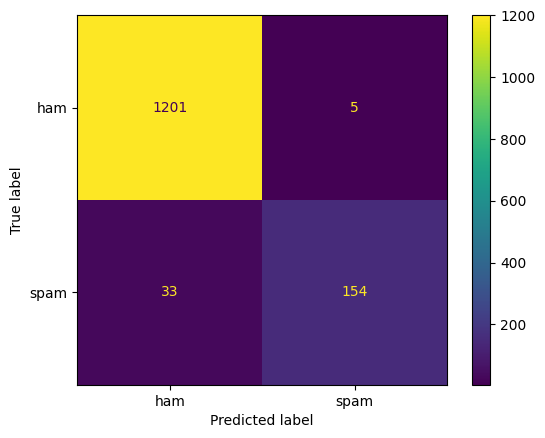

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [90]:
print(classification_report(y_test,y_pred)) # recall is the individual accuracy of each class

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       0.97      0.82      0.89       187

    accuracy                           0.97      1393
   macro avg       0.97      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [91]:
# for Abnormal class(spam) minimum 80% Accuracy required for good model (Here spam has 82% accuracy)

In [92]:
# sample.csv

In [93]:
sample=pd.read_csv("sample.csv",names=['text'],sep='\t')
sample

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [94]:
classifier.predict(tfidf.transform(sample['text'])) # we use only transform on test data

array(['ham', 'spam', 'ham'], dtype=object)

# Save the model

In [95]:
import joblib

In [96]:
joblib.dump(classifier,'model.bin')

['model.bin']

In [97]:
joblib.dump(tfidf,'vectorizer.bin')

['vectorizer.bin']

### Using Lammatizer

In [38]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [39]:
wnl=WordNetLemmatizer()

In [40]:
sent='Hello friends! How are you? Welcome to python Programming'

In [41]:
tokens1=word_tokenize(sent)

In [42]:
tokens2=[x.lower() for x in tokens1 if x not in string.punctuation] 

In [43]:
tokens3=[x for x in tokens2 if x not in stopwords.words('english')]

In [44]:
tokens4=[]
tags=pos_tag(tokens3)
for word in tags:
    if word[1].startswith('N'):
        tokens4.append(wnl.lemmatize(word[0],pos='n'))
    if word[1].startswith('V'):
        tokens4.append(wnl.lemmatize(word[0],pos='v'))
    if word[1].startswith('R'):
        tokens4.append(wnl.lemmatize(word[0],pos='r'))
    if word[1].startswith('J'):
        tokens4.append(wnl.lemmatize(word[0],pos='a'))

In [45]:
tags

[('hello', 'NN'),
 ('friends', 'VBZ'),
 ('welcome', 'JJ'),
 ('python', 'NN'),
 ('programming', 'NN')]

In [46]:
tokens4

['hello', 'friends', 'welcome', 'python', 'programming']

In [47]:
def clean_text1(text):
    ls=LancasterStemmer() 
    tokens1=word_tokenize(text)
    tokens2=[x.lower() for x in tokens1 if x.isalpha() or x.isdigit()] # if x not in string.punctuation
    tokens3=[x for x in tokens2 if x not in stopwords.words('english')] 
    tokens4=[]
    tags=pos_tag(tokens3)
    for word in tags:
        if word[1].startswith('N'):
            tokens4.append(wnl.lemmatize(word[0],pos='n'))
        if word[1].startswith('V'):
            tokens4.append(wnl.lemmatize(word[0],pos='v'))
        if word[1].startswith('R'):
            tokens4.append(wnl.lemmatize(word[0],pos='r'))
        if word[1].startswith('J'):
            tokens4.append(wnl.lemmatize(word[0],pos='a'))
    return tokens4

In [48]:
clean_text1(sent)

['hello', 'friends', 'welcome', 'python', 'programming']

In [49]:
tfidf=TfidfVectorizer(analyzer=clean_text1)
x_vect=tfidf.fit_transform(df['text'])
x_vect

<5572x6188 sparse matrix of type '<class 'numpy.float64'>'
	with 42536 stored elements in Compressed Sparse Row format>

In [50]:
print(tfidf.get_feature_names_out())
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(x_vect,y,random_state=0,stratify=y,test_size=0.25)
print("  ",X_train.shape)
print("   ",X_test.shape)
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred)

['aa' 'aah' 'aaniye' ... 'zouk' 'é' 'ü']
   (4179, 6188)
    (1393, 6188)


In [51]:
acc


0.9755922469490309

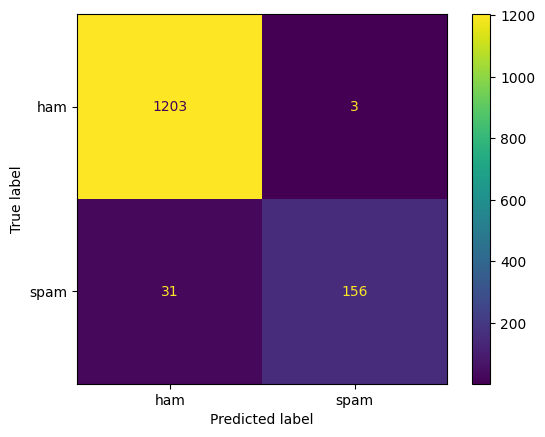

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [53]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1206
        spam       0.98      0.83      0.90       187

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.94      1393
weighted avg       0.98      0.98      0.97      1393



In [54]:
sample=pd.read_csv("sample.csv",names=['text'],sep='\t')
sample
classifier.predict(tfidf.transform(sample['text']))

array(['ham', 'spam', 'ham'], dtype=object)